In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, time, random

from functions_queueing_system import *
from functions_extremum_seeking import *

In [2]:
results_saved = np.load('./results/algo_perf_2param_new.npz', allow_pickle=True)

In [3]:
list(results_saved.keys())

['num_runs',
 'results_all',
 'theta_hat_t_all',
 'theta_bar_pravg_all',
 'theta_bar_star',
 'theta_bar_dim',
 'M',
 'K',
 'T',
 'alpha',
 'beta',
 'w0_bar',
 'gamma_bar',
 'theta_bar_limits',
 'tau',
 'dep_rate',
 'A',
 'B']

In [4]:
results_all = results_saved['results_all']

In [5]:
theta_hat_t_all = results_saved['theta_hat_t_all']
theta_hat_PR_all = results_saved['theta_bar_pravg_all']
theta_bar_star = results_saved['theta_bar_star']

num_runs = results_saved['num_runs']
theta_bar_dim = results_saved['theta_bar_dim']
M = results_saved['M']
K = results_saved['K']
T = results_saved['T']
dep_rate = results_saved['dep_rate']
theta_bar_limits = results_saved['theta_bar_limits']

In [6]:
theta_hat_t_all.shape

(2, 200000, 10)

In [7]:
run_index = 7

In [8]:
pi_t_all = results_all[run_index]['pi_t_all']
X_t = results_all[run_index]['X']
O_t = results_all[run_index]['O']
Z_t = results_all[run_index]['Z']
omega_t = results_all[run_index]['omega_t']

In [9]:
# numvals_x = M+1
# numvals_o = 2
# numvals_z = 2

# x_vals = np.arange(numvals_x) #all values of x
# o_vals = np.arange(numvals_o)
# z_vals = np.arange(numvals_z)

In [10]:
# phi_vals = np.linspace(0, 1, 10)
# LL_phi = np.zeros((len(phi_vals),))

# theta_bar_vals = np.zeros((theta_bar_dim, len(phi_vals)))
# theta_bar_vals[0,:] = theta_hat_PR_all[0,-1, run_index] #final estimate theta_PR
# theta_bar_vals[1,:] = phi_vals[:] #only phi is varied at fixed theta equal to theta hat PR


# tic= time.perf_counter()
# for i in range(len(phi_vals)):
#     LL_phi[i] = compute_log_likelihood_alldata(theta_bar_vals[:,i], O_t, T, z_vals, o_vals, x_vals, K, theta_bar_limits, dep_rate=dep_rate)
#     print(f"phi={phi_vals[i]} done ({i+1}/{len(phi_vals)})")
# toc = time.perf_counter()
# print(f"time={toc-tic}s")

phi=0.0 done (1/10)
phi=0.1111111111111111 done (2/10)
phi=0.2222222222222222 done (3/10)
phi=0.3333333333333333 done (4/10)
phi=0.4444444444444444 done (5/10)
phi=0.5555555555555556 done (6/10)
phi=0.6666666666666666 done (7/10)
phi=0.7777777777777777 done (8/10)
phi=0.8888888888888888 done (9/10)
phi=1.0 done (10/10)
time=1775.2009626s


In [11]:
# thr = 1e-5
# theta_vals = np.linspace(0+thr, 1-thr, 10)
# LL_theta = np.zeros((len(theta_vals),))

# theta_bar_vals2 = np.zeros((2, len(theta_vals)))
# theta_bar_vals2[1,:] = theta_hat_PR_all[1,-1, run_index]
# theta_bar_vals2[0,:] = theta_vals[:] #only theta is varied at fixed theta equal to theta hat PR


# tic= time.perf_counter()
# for i in range(len(theta_vals)):
#     LL_theta[i] = compute_log_likelihood_alldata(theta_bar_vals2[:,i], O_t, T, z_vals, o_vals, x_vals, K, theta_bar_limits, dep_rate=dep_rate)
#     print(f"theta={theta_vals[i]} done ({i+1}/{len(theta_vals)})")
# toc = time.perf_counter()
# print(f"time={toc-tic}s")

theta=1e-05 done (1/10)
theta=0.11111888888888889 done (2/10)
theta=0.2222277777777778 done (3/10)
theta=0.33333666666666667 done (4/10)
theta=0.4444455555555556 done (5/10)
theta=0.5555544444444445 done (6/10)
theta=0.6666633333333333 done (7/10)
theta=0.7777722222222222 done (8/10)
theta=0.8888811111111111 done (9/10)
theta=0.99999 done (10/10)
time=1511.1698271999976s


In [12]:
# np.savez('./results/log_likelihood_onerun_new.npz', LL_phi=LL_phi, LL_theta=LL_theta, theta_bar_vals=theta_bar_vals, theta_bar_vals2=theta_bar_vals2, O_t=O_t, \
#         T=T, z_vals=z_vals, o_vals=o_vals, x_vals=x_vals, K=K, theta_bar_limits=theta_bar_limits, dep_rate=dep_rate, run_index=run_index, results=results_all[run_index])

# Plots for single run (Symmetric case)

In [13]:
loglik_results = np.load('./results/log_likelihood_onerun_new.npz') #load saved log likelihood results
LL_phi = loglik_results['LL_phi']
LL_theta = loglik_results['LL_theta']
theta_bar_vals = loglik_results['theta_bar_vals']
theta_bar_vals2 = loglik_results['theta_bar_vals2']
phi_vals = theta_bar_vals[1,:]
theta_vals = theta_bar_vals2[0,:]

C:\Users\Sumedh\AppData\Local\Temp\ipykernel_8992\3555598350.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


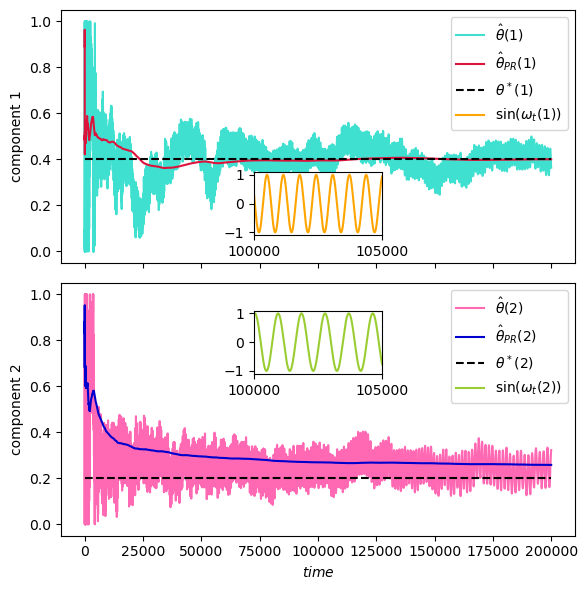

In [23]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


x_limits_omega= [100000, 105000]

fig, ax = plt.subplots(2,1, sharex=True, figsize=(6, 6))

colors_iter = ['turquoise', 'hotpink']
colors_pr = ['crimson','mediumblue']
colors_om = ['orange', 'yellowgreen']
labels_iter = [r'$\hat{\theta}(1)$', r'$\hat{\theta}(2)$']
labels_pr = [r'$\hat{\theta}_{PR}(1)$', r'$\hat{\theta}_{PR}(2)$']
labels_true = [r'$\theta^*(1)$', r'$\theta^*(2)$']
axin = [None, None]
loc_in = ['lower center', 'upper center']

for i in range(theta_bar_dim):
    ax[i].plot(theta_hat_t_all[i,:,run_index], color=colors_iter[i], label=labels_iter[i])
    ax[i].plot(theta_hat_PR_all[i,:,run_index], color=colors_pr[i], label=labels_pr[i])
    ax[i].hlines(theta_bar_star[i], 0, T, linestyles='dashed', colors='k', label=labels_true[i])
    ax[i].set_ylabel(f"component {i+1}")

    han, lab = ax[i].get_legend_handles_labels()
    axin[i] = inset_axes(ax[i], width="25%", height="25%", borderpad=2, loc=loc_in[i])
    axin[i].plot(np.sin(omega_t[i,:]), color=colors_om[i], label=r'$\sin(\omega_t$'+f"({i+1}))")
    axin[i].set_xlim(x_limits_omega[0], x_limits_omega[1])
    axin[i].set_xticks(ticks=x_limits_omega)
    han_in, lab_in =  axin[i].get_legend_handles_labels()
    ax[i].legend(han+han_in, lab+lab_in)
    
ax[1].set_xlabel(r'$time$')
plt.tight_layout()
# plt.savefig('./figures/qs-multiparam-iterates.eps', dpi=300, bbox_inches='tight')

In [15]:
pi_t_all.shape

(101, 200000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


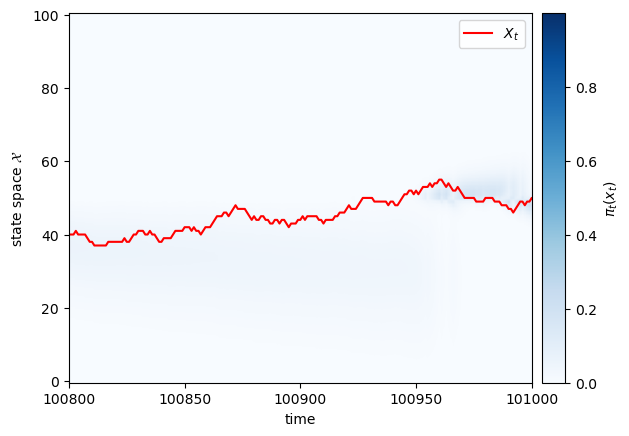

In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

x_limits = [100800, 101000]
fig, ax = plt.subplots()

im = ax.imshow(pi_t_all, origin='lower', cmap='Blues', aspect='auto')
ax.plot(X_t, color='r')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im,cax=cax, label=r"$\pi_t(x_t)$")
ax.set_xlim(x_limits[0],x_limits[1])
ax.legend([r'$X_t$'])
ax.set_xticks([100800+50*i for i in range(5)])
# ax.set_title(r"Evolution of $\pi_t(x_t)$")
# ax[2].set_title( r"$\bf{(B)}$ "+ r"Belief state $\pi_t(x_t)$, latent state $x_t$ vs t")
ax.set_xlabel("time")
ax.set_ylabel('state space '+r'$\mathcal{X}$')

# plt.savefig('./figures/qs-multiparam-pi-iterate.eps', dpi=300, bbox_inches='tight')

In [17]:
omega_t.shape

(2, 200000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


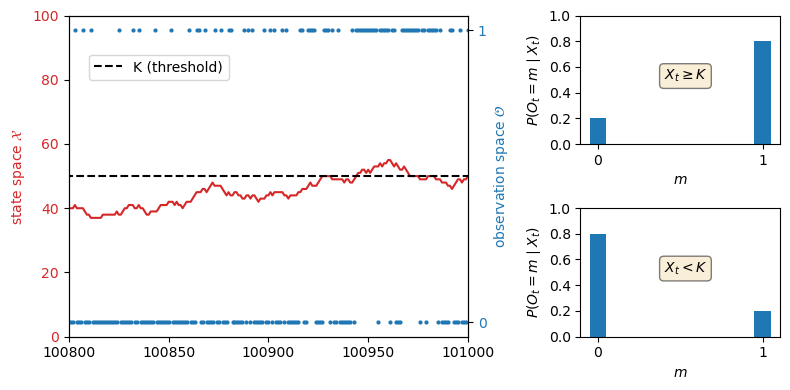

In [25]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8,4))
gs = GridSpec(2, 2, figure=fig, width_ratios=[2, 1])
xlimits = [100800, 101000]
# fig, ax = plt.subplots()

ax = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1,1])

color0 = 'tab:red'
ax.set_ylabel('state space '+r'$\mathcal{X}$', color=color0)
ax.plot(X_t, color=color0)
ax.set_xticks([xlimits[0]+50*i  for i in range(5)])
ax.tick_params(axis='y', labelcolor=color0)
ax.hlines(K, 0, T, linestyles='dashed', colors='k', label='K (threshold)')

ax0b = ax.twinx()
color1 = 'tab:blue'
ax0b.set_ylabel('observation space '+r'$\mathcal{O}$', color=color1)
ax0b.plot(O_t, color=color1, linestyle='', marker='o', markersize=2, label=r'$O_t$')
ax0b.set_yticks([0,1])
ax0b.tick_params(axis='y', labelcolor=color1)

ax.legend(loc=(0.05, 0.8))


ax.set_ylim(0, M)
ax.set_xlim(xlimits[0], xlimits[1])

o_vals, counts2 = np.unique(O_t[X_t>=K], return_counts=True)
counts2 = counts2/np.sum(counts2)

_, counts3 = np.unique(O_t[X_t<K], return_counts=True)
counts3 = counts3/np.sum(counts3)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax2.bar(o_vals, counts2, width=0.1)
ax2.text(0.4, 0.5, r"$X_t \geq K$", bbox=props)
ax2.set_ylabel(r'$P(O_t=m \mid X_t)$')
ax2.set_xlabel(r'$m$')
ax2.set_xticks([0, 1])
ax2.set_yticks([0.2*i for i in range(6)])

ax3.bar(o_vals, counts3, width=0.1)
ax3.text(0.4, 0.5, r"$X_t < K$", bbox=props)
ax3.set_ylabel(r'$P(O_t=m \mid X_t)$')
ax3.set_xlabel(r'$m$')
ax3.set_xticks([0, 1])
ax3.set_yticks([0.2*i for i in range(6)])

# ax2.scatter(o_vals, counts2)

# ax3.scatter(o_vals, counts3)

fig.tight_layout()

# plt.savefig('./figures/qs-multiparam-dynamics.eps', dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Log likelihood (avg) vs $\\phi$ for $\\theta\\approx $0.4')

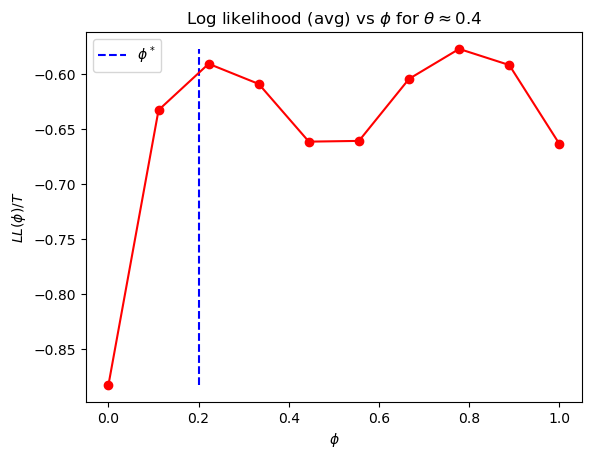

In [19]:
plt.vlines(theta_bar_star[1], np.amin(LL_phi/T), np.amax(LL_phi/T), linestyles='dashed', colors='b', label=r'$\phi^*$')
# plt.hlines(np.amax(LL_phi/T), phi_vals[0], phi_vals[-1], linestyles='dashed', colors='g', label=r'$LL(\phi^*)$')
plt.plot(phi_vals, LL_phi/T, 'ro-')
plt.legend()
plt.xlabel(r"$\phi$")
plt.ylabel(r"$LL(\phi)/T$")
plt.title(r"Log likelihood (avg) vs $\phi$ for $\theta\approx $"+str(round(theta_bar_vals[0,0], 2)))

Text(0.5, 1.0, 'Log likelihood (avg) vs $\\theta$ for $\\phi\\approx$0.26')

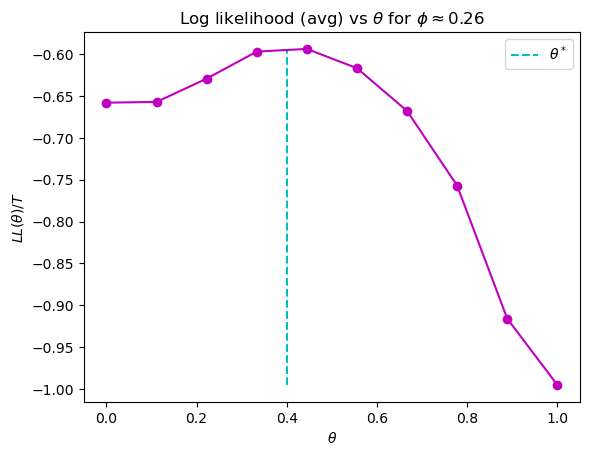

In [20]:
plt.vlines(theta_bar_star[0], np.amin(LL_theta/T), np.amax(LL_theta/T), linestyles='dashed', colors='c', label=r'$\theta^*$')
# plt.hlines(np.amax(LL_theta/T), theta_vals[0], theta_vals[-1], linestyles='dashed', colors='gray', label=r'$LL(\theta^*)$')
plt.plot(theta_vals, LL_theta/T, 'mo-')
plt.legend()
plt.xlabel(r"$\theta$")
plt.ylabel(r"$LL(\theta)/T$")
plt.title(r"Log likelihood (avg) vs $\theta$ for $\phi\approx$"+f"{round(theta_bar_vals2[1,0], 2)}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


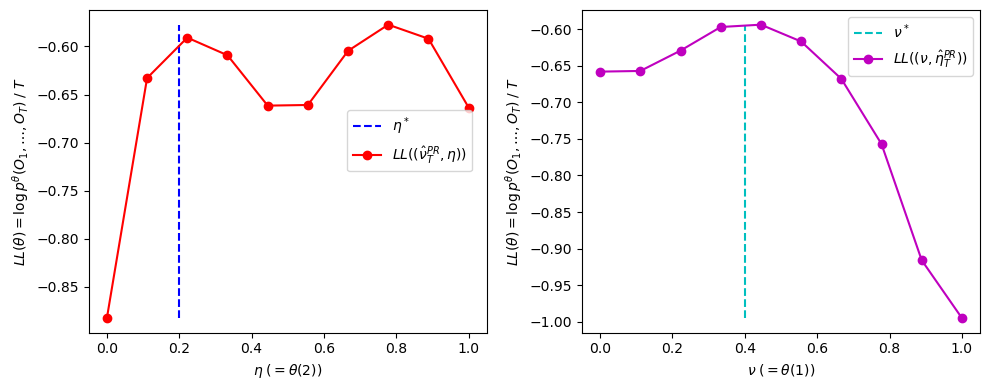

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].vlines(theta_bar_star[1], np.amin(LL_phi/T), np.amax(LL_phi/T), linestyles='dashed', colors='b', label=r'$\eta^*$')
# plt.hlines(np.amax(LL_phi/T), phi_vals[0], phi_vals[-1], linestyles='dashed', colors='g', label=r'$LL(\phi^*)$')
ax[0].plot(phi_vals, LL_phi/T, 'ro-', label=r'$LL((\hat{\nu}^{PR}_{T},\eta))$')
ax[0].legend(loc=(0.65, 0.5))
ax[0].set_xlabel(r"$\eta\; (=\theta(2))$")
ax[0].set_ylabel(r"$LL(\theta)=\log p^{\theta}(O_1, \dots, O_T)\;/\;T$")
# plt.title(r"Log likelihood (avg) vs $\phi$ for $\theta\approx $"+str(round(theta_bar_vals[0,0], 2)))

ax[1].vlines(theta_bar_star[0], np.amin(LL_theta/T), np.amax(LL_theta/T), linestyles='dashed', colors='c', label=r'$\nu^*$')
# plt.hlines(np.amax(LL_theta/T), theta_vals[0], theta_vals[-1], linestyles='dashed', colors='gray', label=r'$LL(\theta^*)$')
ax[1].plot(theta_vals, LL_theta/T, 'mo-', label=r"$LL((\nu,\hat{\eta}^{PR}_T))$")
ax[1].legend()
ax[1].set_xlabel(r"$\nu \; (=\theta(1))$")
ax[1].set_ylabel(r"$LL(\theta)=\log p^{\theta}(O_1, \dots, O_T)\;/\;T$")
# plt.title(r"Log likelihood (avg) vs $\theta$ for $\phi\approx$"+f"{round(theta_bar_vals2[1,0], 2)}")
fig.tight_layout()
# plt.savefig('./figures/qs-multiparam-loglik.eps', dpi=300, bbox_inches='tight')

# Multiple runs

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


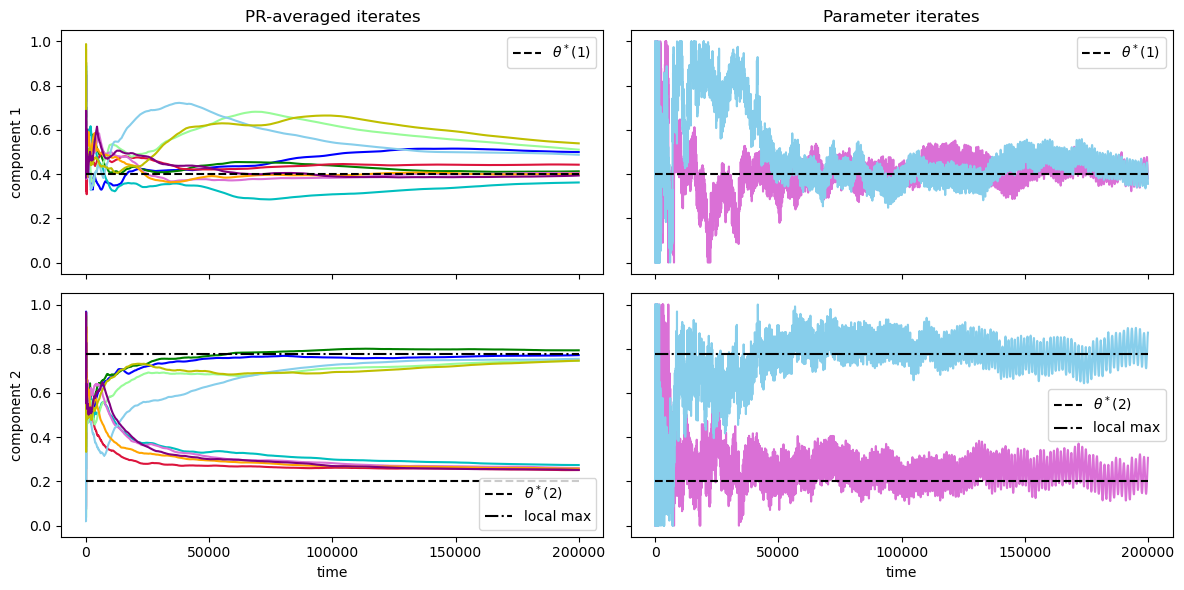

In [34]:
colors_all = ['b', 'g', 'crimson', 'c', 'palegreen', 'orchid', 'skyblue', 'orange',  'y', 'purple']

fig, ax = plt.subplots(int(theta_bar_dim), 2, sharex=True, sharey=True, figsize=(12,6))
for i in range(theta_bar_dim):
    for j in range(num_runs):
        ax[i, 0].plot(theta_hat_PR_all[i,:,j], color=colors_all[j])
    ax[i, 0].hlines(theta_bar_star[i], 0, T, linestyles='dashed', colors='k', label=r'$\theta^*$'+f"({i+1})")
    
ax[1, 0].hlines(phi_vals[np.argmax(LL_phi)], 0, T, linestyles='dashdot', colors='k', label="local max")
ax[0,0].legend()
ax[1,0].legend()
ax[1, 0].set_xticks([50000*i for i in range(5)])

select_runs = [5, 6]

for i in range(theta_bar_dim):
    for j in select_runs:
        ax[i, 1].plot(theta_hat_t_all[i,:,j], color=colors_all[j])
    ax[i, 1].hlines(theta_bar_star[i], 0, T, linestyles='dashed', colors='k', label=r'$\theta^*$'+f"({i+1})")
    ax[i,1].legend()
ax[1, 1].hlines(phi_vals[np.argmax(LL_phi)], 0, T, linestyles='dashdot', colors='k', label="local max")
ax[1, 1].set_xticks([50000*i for i in range(5)])
ax[0, 1].legend()
ax[1,1].legend()
ax[0, 0].set_ylabel('component 1')
ax[1, 0].set_ylabel('component 2')
ax[1,1].set_xlabel('time')
ax[1,0].set_xlabel('time')

ax[0,0].set_title("PR-averaged iterates")
ax[0,1].set_title("Parameter iterates")

fig.tight_layout()

# plt.savefig('./figures/qs-multiparam-multiruns.eps', dpi=300, bbox_inches='tight')